<a href="https://colab.research.google.com/github/Rahmamouradsayed/ML-models-from-scratch-/blob/main/Naive_Bayes_Classifier_Rahma_Mourad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [ ]:
#Load dataset using pandas.
dataset_titanic=pd.read_csv("titanic_dataset.csv")

In [ ]:
dataset_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset_titanic.shape

(891, 12)

In [ ]:
# understand the features and their types
dataset_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#print statistic data
dataset_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#missing values
dataset_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#check for duplicated values
dataset_titanic.duplicated().sum()

0

In [ ]:
#check is this column balnced or not to be the target column without bais
dataset_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<ipython-input-39-1957c6afa477>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=dataset_titanic, palette='Set2')


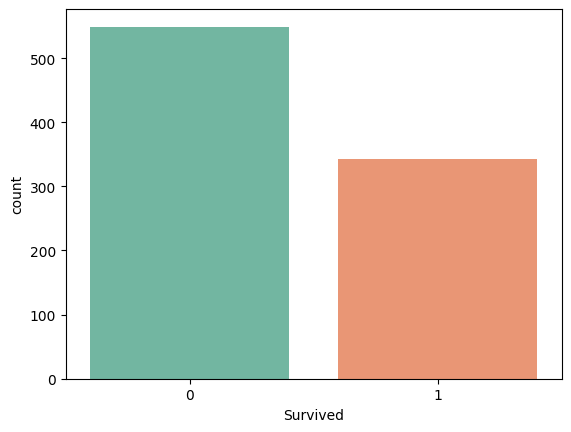

In [ ]:
#Show how many people survived
sns.countplot(x='Survived', data=dataset_titanic, palette='Set2')
plt.show()

In [ ]:
#calculate persantage of missing values for column Cabin
print('Percent of missing Cabin records is %.2f%%' %((dataset_titanic['Cabin'].isnull().sum()/dataset_titanic.shape[0])*100))

Percent of missing Cabin records is 77.10%


In [ ]:
#After show the big percentage of missing values in cabin column
dataset_titanic.drop('Cabin', axis=1, inplace=True) #drop cabin column

In [ ]:
#fill column Embarked because it is signify column
dataset_titanic['Embarked'].fillna('S', inplace=True)
dataset_titanic.shape

(891, 11)

In [ ]:
#handel missing values
age_median=dataset_titanic['Age'].median()
dataset_titanic['Age'].fillna(age_median, inplace= True)

In [ ]:
#Check if there are still missing values
dataset_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#drop unnecessary columns
dataset_titanic.drop(['PassengerId', 'Name'],inplace=True,axis=1)
dataset_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
dataset_titanic['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [ ]:
#drop column Ticket it is unuseful
dataset_titanic.drop(['Ticket'],inplace=True,axis=1)
dataset_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
encode_titanic_columns=pd.get_dummies(dataset_titanic, columns=['Pclass',"Embarked", "Sex"],dtype=int)
encode_titanic_columns.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


choose the survived column to be the target because this column it is will be useful to classifay which one is survived 1 or which one it is not survived

In [ ]:
X = titanic.drop('Survived',axis=1) #features
y = titanic['Survived'] #Target

In [ ]:
#Train your model on the training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [ ]:
#Implement a Naive Bayes classifier using scikit-learn
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predict model
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
#Calculate and print accuracy model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7709


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[81 24]
 [17 57]]

True Positives(TP) =  81

True Negatives(TN) =  57

False Positives(FP) =  24

False Negatives(FN) =  17


In [ ]:
# Evaluate the model such as accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.77
Precision: 0.70
Recall: 0.77
F1-Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.70      0.77      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



In [ ]:
# Perform cross-validation
cv_accuracy = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
cv_precision = cross_val_score(gnb, X, y, cv=10, scoring='precision')
cv_recall = cross_val_score(gnb, X, y, cv=10, scoring='recall')
cv_f1 = cross_val_score(gnb, X, y, cv=10, scoring='f1')

print(f'\nCross-Validation Accuracy: {cv_accuracy.mean():.2f} ')
print(f'Cross-Validation Precision: {cv_precision.mean():.2f} ')
print(f'Cross-Validation Recall: {cv_recall.mean():.2f}')
print(f'Cross-Validation F1-Score: {cv_f1.mean():.2f}')


Cross-Validation Accuracy: 0.79 
Cross-Validation Precision: 0.72 
Cross-Validation Recall: 0.74
Cross-Validation F1-Score: 0.72
